# Practical Exam: House sales

RealAgents is a real estate company that focuses on selling houses.

RealAgents sells a variety of types of house in one metropolitan area.

Some houses sell slowly and sometimes require lowering the price in order to find a buyer.

In order to stay competitive, RealAgents would like to optimize the listing prices of the houses it is trying to sell.

They want to do this by predicting the sale price of a house given its characteristics.

If they can predict the sale price in advance, they can decrease the time to sale.


## Data

The dataset contains records of previous houses sold in the area.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton'. </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced" (two shared walls), "Semi-detached" (one shared wall), or "Detached" (no shared walls). </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |


# Task 1

The team at RealAgents knows that the city that a property is located in makes a difference to the sale price. 

Unfortuntately they believe that this isn't always recorded in the data. 

Calculate the number of missing values of the `city`. 

 - You should use the data in the file "house_sales.csv". 

 - Your output should be an object `missing_city`, that contains the number of missing values in this column. 

In [1]:
# Use this cell to write your code for Task 1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Loading th file
house_sales = pd.read_csv('house_sales.csv')
display(house_sales.head())

# Checking for Null values
print(f'Number of missing values in city column: {house_sales["city"].isna().sum()}\n')

# Filling Null values with mean imputation
mean_months = round(house_sales['months_listed'].mean(), 1)
house_sales['months_listed'] = house_sales['months_listed'].fillna(mean_months)

# Missing city 
missing_city = house_sales.isna().sum()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8 sq.m.
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8 sq.m.
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5 sq.m.
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Det.,528.4 sq.m.
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1 sq.m.


Number of missing values in city column: 0



In [2]:
house_sales.isna().sum()

house_id         0
city             0
sale_price       0
sale_date        0
months_listed    0
bedrooms         0
house_type       0
area             0
dtype: int64

In [3]:
house_sales.head()

,house_id,city,sale_price,sale_date,months_listed,bedrooms,house_type,area
0,1217792,Silvertown,55943,2021-09-12,5.4,2,Semi-detached,107.8 sq.m.
1,1900913,Silvertown,384677,2021-01-17,6.3,5,Detached,498.8 sq.m.
2,1174927,Riverford,281707,2021-11-10,6.9,6,Detached,542.5 sq.m.
3,1773666,Silvertown,373251,2020-04-13,6.1,6,Det.,528.4 sq.m.
4,1258487,Silvertown,328885,2020-09-24,8.7,5,Detached,477.1 sq.m.


# Task 2 

Before you fit any models, you will need to make sure the data is clean. 

The table below shows what the data should look like. 

Create a cleaned version of the dataframe. 

 - You should start with the data in the file "house_sales.csv". 

 - Your output should be a dataframe named `clean_data`. 

 - All column names and values should match the table below.


| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton' </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced", "Semi-detached", or "Detached". </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |

In [4]:
# Use this cell to write your code for Task 2
house_sales['city'] = house_sales['city'].str.replace('--', 'Unknown')

# Remove rows where 'sale_price' has a missing value
house_sales.dropna(subset=['sale_price'], inplace=True)

# Verify that missing values in 'sale_price' have been removed (optional)
print(f"- Number of missing values in sale_price after removal: {house_sales['sale_price'].isna().sum()} \n")

# Replace missing values in 'sale_date' with '2023-01-01'
house_sales.fillna({'sale_date': '2023-01-01'}, inplace=True)
house_sales['sale_date'] = pd.to_datetime(house_sales['sale_date'])

# Verify that missing values in 'sale_date' have been replaced (optional)
print(f"- Number of missing values in sale_date after replacement: {house_sales['sale_date'].isna().sum()} \n")

# Filling Null values with mean imputation
mean_months = round(house_sales['months_listed'].mean(), 1)
house_sales['months_listed'] = house_sales['months_listed'].fillna(mean_months)

# Calculate the mean of the 'bedrooms' column
mean_bedrooms = house_sales['bedrooms'].mean()

# Round the mean to the nearest integer
rounded_mean_bedrooms = np.round(mean_bedrooms)

# Replace missing values in 'bedrooms' with the rounded mean
house_sales.fillna({'bedrooms': rounded_mean_bedrooms}, inplace=True)

# Verify that missing values in 'bedrooms' have been replaced (optional)
print(f"- Number of missing values in bedrooms after replacement: {house_sales['bedrooms'].isna().sum()}")
print(f"- Mean number of bedrooms before replacement: {mean_bedrooms}")
print(f"- Rounded mean number of bedrooms used for replacement: {rounded_mean_bedrooms} \n")

# Replace missing values in 'house_type' with the most common value
most_common = house_sales['house_type'].mode()[0]
house_sales['house_type'] = house_sales['house_type'].fillna(most_common)

# Convert to ordinal categorical type with specified categories
house_sales['house_type'] = pd.Categorical(house_sales['house_type'], 
                                           categories=["Terraced", "Semi-detached", "Detached"],
                                           ordered=True).fillna('Detached')

# Replacing sq.m. with '' 
house_sales['area'] = house_sales['area'].str.replace('sq.m.','').astype(float)

# Calculate the mean of the 'area' column
mean_area = house_sales['area'].mean()

# Round the mean to one decimal place
rounded_mean_area = round(mean_area, 1)

# Replace missing values in 'area' with the rounded mean
house_sales.fillna({'area': rounded_mean_area}, inplace=True)

# house_sales['area'].fillna(rounded_mean_area, inplace=True)

# Verify that missing values in 'area' have been replaced (optional)
print(f"- Number of missing values in area after replacement: {house_sales['area'].isna().sum()}")
print(f"- Mean area before replacement: {mean_area}")
print(f"- Rounded mean area used for replacement: {rounded_mean_area} \n")

clean_data = house_sales

- Number of missing values in sale_price after removal: 0 

- Number of missing values in sale_date after replacement: 0 

- Number of missing values in bedrooms after replacement: 0
- Mean number of bedrooms before replacement: 4.018
- Rounded mean number of bedrooms used for replacement: 4.0 

- Number of missing values in area after replacement: 0
- Mean area before replacement: 352.12393333333335
- Rounded mean area used for replacement: 352.1 



In [5]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   house_id       1500 non-null   int64         
 1   city           1500 non-null   object        
 2   sale_price     1500 non-null   int64         
 3   sale_date      1500 non-null   datetime64[ns]
 4   months_listed  1500 non-null   float64       
 5   bedrooms       1500 non-null   int64         
 6   house_type     1500 non-null   category      
 7   area           1500 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 83.8+ KB


# Task 3 

The team at RealAgents have told you that they have always believed that the number of bedrooms is the biggest driver of house price. 

Producing a table showing the difference in the average sale price by number of bedrooms along with the variance to investigate this question for the team.

 - You should start with the data in the file 'house_sales.csv'.

 - Your output should be a data frame named `price_by_rooms`. 

 - It should include the three columns `bedrooms`, `avg_price`, `var_price`. 

 - Your answers should be rounded to 1 decimal place.   

In [6]:
# Use this cell to write your code for Task 3
price_by_rooms = clean_data.groupby('bedrooms')['sale_price'].agg(
    avg_price='mean',
    var_price='var'
).round(1)
price_by_rooms = price_by_rooms.reset_index()
price_by_rooms

,bedrooms,avg_price,var_price
0,2,67076.4,5.652896e+08
1,3,154665.1,2.378289e+09
2,4,234704.6,1.725211e+09
3,5,301515.9,2.484328e+09
4,6,375741.3,3.924432e+09


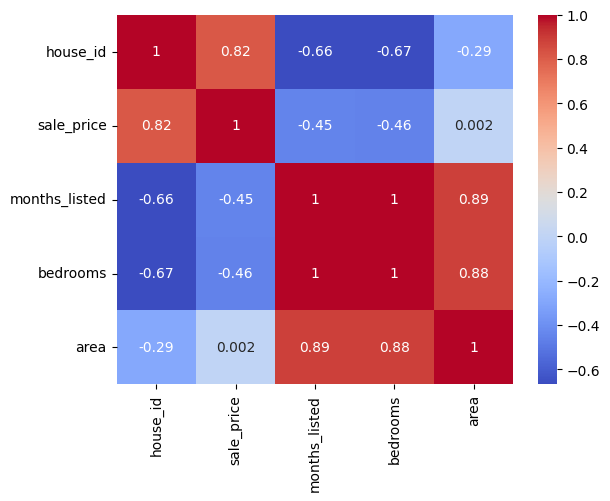

In [7]:
train_df = pd.read_csv('train.csv')
validation_df = pd.read_csv('validation.csv')
train_corr = train_df.describe()
sns.heatmap(train_corr.corr(), annot=True, cmap='coolwarm')
plt.show()

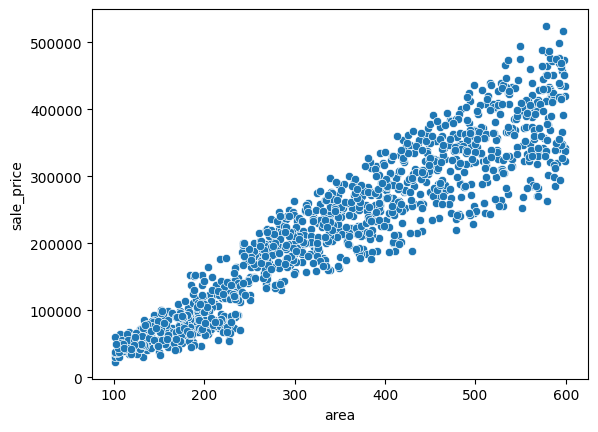

In [8]:
sns.scatterplot(x='area', y='sale_price', data=train_df)
plt.show()

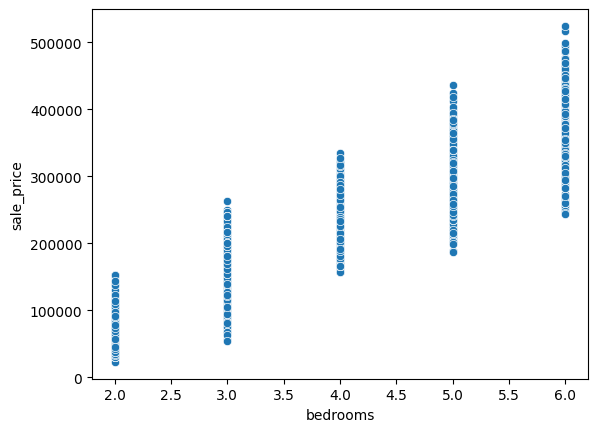

In [9]:
sns.scatterplot(x='bedrooms', y='sale_price', data=train_df)
plt.show()

# Task 4

Fit a baseline model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `base_result`, that includes `house_id` and `price`. The price column must be your predicted values.

In [10]:
train_df = train_df.drop(columns=['sale_date', 'months_listed'])

In [11]:
for col in train_df.columns:
    if train_df[col].dtype == 'object' or train_df[col].dtype == 'category':
        train_df[col] = LabelEncoder().fit_transform(train_df[col])
train_df.head()

,house_id,city,sale_price,bedrooms,house_type,area
0,1634561,3,401869,6,0,519.7
1,1009770,2,372387,6,0,507.8
2,1946667,2,325473,5,0,466.8
3,1798290,2,349469,5,0,499.4
4,1533461,0,199995,4,0,335.0


In [12]:
# Use this cell to write your code for Task 4
X = train_df.drop(columns=['house_id', 'sale_price'], axis=1)
y = train_df['sale_price']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
rmse_linear = np.sqrt(mse)

# Print the results 
print(f'Mean Squared Error: {mse:,.2f}')
print(f"R-squared (R2) Score: {r2_linear:.2f}")
print(f"RMSE: {rmse_linear:.2f}")

# Using precision score
print(f"Precision Score: {model.score(X_test, y_test)}\n")

# Filtering for object and category columns
for col in validation_df.columns:
    if validation_df[col].dtype == 'object' or validation_df[col].dtype == 'category':
        validation_df[col] = LabelEncoder().fit_transform(validation_df[col])
# display(validation_df.head(3))

X_validation_lr = validation_df[['city', 'bedrooms', 'house_type', 'area']]
lr_predictions = model.predict(X_validation_lr)

# Round the predictions to two decimal places
rounded_predictions = np.round(lr_predictions, 1)

# Create the base_result DataFrame
base_result = pd.DataFrame({'house_id': validation_df['house_id'], 'price': rounded_predictions})
base_result

Mean Squared Error: 777,499,494.45
R-squared (R2) Score: 0.95
RMSE: 27883.68
Precision Score: 0.9467753289113575



,house_id,price
0,1331375,112674.2
1,1630115,296229.5
2,1645745,383357.7
3,1336775,120622.2
4,1888274,270848.0
...,...,...
295,1986255,353442.9
296,1896276,368618.9
297,1758223,257046.0
298,1752010,156772.9


# Task 5

Fit a comparison model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `compare_result`, that includes `house_id` and `price`. The price column must be your predicted values.

In [13]:
# Use this cell to write your code for Task 5

# Select features and target variable
features = train_df[['bedrooms', 'area']]
target = train_df['sale_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)
rmse_rf = np.sqrt(mse)

print(f"Mean Squared Error on Test Set: {mse:,.2f}")
print(f"R-squared (R2) Score: {r2_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"Precision Score: {model.score(X_test, y_test)}\n")

for col in validation_df.columns:
    if validation_df[col].dtype == 'object' or validation_df[col].dtype == 'category':
        validation_df[col] = LabelEncoder().fit_transform(validation_df[col])
# display(val.head(2))

X_validation_rf = validation_df[['bedrooms', 'area']]
rf_predictions = model.predict(X_validation_rf)

# Round the predictions to two decimal places
rounded_predictions = np.round(rf_predictions, 1)

# Create the base_result DataFrame
compare_result = pd.DataFrame({'house_id': validation_df['house_id'], 'price': rounded_predictions})
compare_result

Mean Squared Error on Test Set: 2,301,467,598.14
R-squared (R2) Score: 0.84
RMSE: 47973.61
Precision Score: 0.8424502436244745



,house_id,price
0,1331375,93254.9
1,1630115,278435.1
2,1645745,377591.3
3,1336775,122797.2
4,1888274,272379.6
...,...,...
295,1986255,269889.6
296,1896276,331145.4
297,1758223,249716.9
298,1752010,216018.2
